In this analysis, the **World Happiness Report** from 2015 to 2017 will be explored.

# Objective

Identify if there are **geographic**, **demographic**, and/or **economic** factors that contribute to a **happier** life


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Load and examine the data

The public dataset, World Happiness Report is used to figure out those factors that contribute to happier life.

If you like, you can read more about the dataset [here](https://www.kaggle.com/datasets/unsdsn/world-happiness).

In [2]:
# Read files into variables, corresponding to the dates
pd.set_option('display.max_rows', 10)
df_2015 = pd.read_csv("data/2015.csv", index_col=0)
df_2016 = pd.read_csv("data/2016.csv", index_col=0)
df_2017 = pd.read_csv("data/2017.csv", index_col=0)

In [3]:
# Show basic information of data
df_2015.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158 entries, Switzerland to Togo
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         158 non-null    object 
 1   Happiness Rank                 158 non-null    int64  
 2   Happiness Score                158 non-null    float64
 3   Standard Error                 158 non-null    float64
 4   Economy (GDP per Capita)       158 non-null    float64
 5   Family                         158 non-null    float64
 6   Health (Life Expectancy)       158 non-null    float64
 7   Freedom                        158 non-null    float64
 8   Trust (Government Corruption)  158 non-null    float64
 9   Generosity                     158 non-null    float64
 10  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.8+ KB


In [4]:
# Show basic information of data
df_2016.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, Denmark to Burundi
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Region                         157 non-null    object 
 1   Happiness Rank                 157 non-null    int64  
 2   Happiness Score                157 non-null    float64
 3   Lower Confidence Interval      157 non-null    float64
 4   Upper Confidence Interval      157 non-null    float64
 5   Economy (GDP per Capita)       157 non-null    float64
 6   Family                         157 non-null    float64
 7   Health (Life Expectancy)       157 non-null    float64
 8   Freedom                        157 non-null    float64
 9   Trust (Government Corruption)  157 non-null    float64
 10  Generosity                     157 non-null    float64
 11  Dystopia Residual              157 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory us

In [5]:
# Show basic information of data
df_2017.info()

<class 'pandas.core.frame.DataFrame'>
Index: 155 entries, Norway to Central African Republic
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Happiness.Rank                 155 non-null    int64  
 1   Happiness.Score                155 non-null    float64
 2   Whisker.high                   155 non-null    float64
 3   Whisker.low                    155 non-null    float64
 4   Economy..GDP.per.Capita.       155 non-null    float64
 5   Family                         155 non-null    float64
 6   Health..Life.Expectancy.       155 non-null    float64
 7   Freedom                        155 non-null    float64
 8   Generosity                     155 non-null    float64
 9   Trust..Government.Corruption.  155 non-null    float64
 10  Dystopia.Residual              155 non-null    float64
dtypes: float64(10), int64(1)
memory usage: 14.5+ KB


# Data Cleaning

#### Steps
    1. Check for null values

In [6]:
# Show basic information of data
df_2015.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
                                ..
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Length: 11, dtype: int64

In [7]:
# Show basic information of data
df_2016.isnull().sum()

Region                           0
Happiness Rank                   0
Happiness Score                  0
Lower Confidence Interval        0
Upper Confidence Interval        0
                                ..
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Length: 12, dtype: int64

In [8]:
# Show basic information of data
df_2017.isnull().sum()

Happiness.Rank                   0
Happiness.Score                  0
Whisker.high                     0
Whisker.low                      0
Economy..GDP.per.Capita.         0
                                ..
Health..Life.Expectancy.         0
Freedom                          0
Generosity                       0
Trust..Government.Corruption.    0
Dystopia.Residual                0
Length: 11, dtype: int64

In [9]:
# Add Year column to each of the dataframe to identify the records for the different years before 
# combining the dataframes into one dataframe
year = '2015'
df_2015['Year'] = year

df_2015

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015


In [10]:
# Add Year column to each of the dataframe to identify the records for the different years before 
# combining the dataframes into onr dataframe
year = '2016'
df_2016['Year'] = year

df_2016

,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,,,
Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
Afghanistan,Southern Asia,154,3.360,3.288,3.432,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
Togo,Sub-Saharan Africa,155,3.303,3.192,3.414,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016


In [11]:
# Add Year column to each of the dataframe to identify the records for the different years before 
# combining the dataframes into onr dataframe
year = '2017'
df_2017['Year'] = year

df_2017

,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Year
Country,,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017


In [12]:
# The number of rows vary among the dataframes. this means either that there were no records for spme countries in certain year,
# or that they were excluded for come reasons. Also the attributenames for 2017 were slightly different from the previous years.
# To ensure consistencies:
# 1. examine the columns for each year
# 2. rename inconsistent columns in 2017
# 3. drop columns not found in all the three dataframes

df_2015.columns

Index(['Region', 'Happiness Rank', 'Happiness Score', 'Standard Error',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [13]:
df_2016.columns

Index(['Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

In [14]:
df_2017.columns

Index(['Happiness.Rank', 'Happiness.Score', 'Whisker.high', 'Whisker.low',
       'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
       'Freedom', 'Generosity', 'Trust..Government.Corruption.',
       'Dystopia.Residual', 'Year'],
      dtype='object')

In [15]:
# 2. rename inconsistent columns in 2017
df_2017 = df_2017.rename(columns={'Happiness.Rank': 'Happiness Rank',
                       'Happiness.Score': 'Happiness Score',
                       'Economy..GDP.per.Capita.': 'Economy (GDP per Capita)',
                       'Health..Life.Expectancy.': 'Health (Life Expectancy)',
                       'Trust..Government.Corruption.': 'Trust (Government Corruption)',
                       'Dystopia.Residual': 'Dystopia Residual'})

df_2017


,Happiness Rank,Happiness Score,Whisker.high,Whisker.low,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
Country,,,,,,,,,,,,
Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,151,3.471,3.543030,3.398970,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
Syria,152,3.462,3.663669,3.260331,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
Tanzania,153,3.349,3.461430,3.236570,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017


In [16]:
# 3. drop columns not found in all the three dataframes
df_15 = df_2015.drop('Standard Error', axis=1)
df_15

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,Sub-Saharan Africa,154,3.465,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042,2015
Benin,Sub-Saharan Africa,155,3.340,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328,2015
Syria,Middle East and Northern Africa,156,3.006,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858,2015


In [17]:
# 3. drop columns not found in all the three dataframes
df_16 = df_2016.drop(['Lower Confidence Interval', 'Upper Confidence Interval'], axis=1)

df_16

,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,
Denmark,Western Europe,1,7.526,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
Switzerland,Western Europe,2,7.509,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
Iceland,Western Europe,3,7.501,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
Norway,Western Europe,4,7.498,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
Finland,Western Europe,5,7.413,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016
...,...,...,...,...,...,...,...,...,...,...,...
Benin,Sub-Saharan Africa,153,3.484,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812,2016
Afghanistan,Southern Asia,154,3.360,0.38227,0.11037,0.17344,0.16430,0.07112,0.31268,2.14558,2016
Togo,Sub-Saharan Africa,155,3.303,0.28123,0.00000,0.24811,0.34678,0.11587,0.17517,2.13540,2016


In [18]:
# 3. drop columns not found in all the three dataframes
df_17 = df_2017.drop(['Whisker.high', 'Whisker.low'], axis=1)

df_17

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Generosity,Trust (Government Corruption),Dystopia Residual,Year
Country,,,,,,,,,,
Norway,1,7.537,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
Denmark,2,7.522,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
Iceland,3,7.504,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
Switzerland,4,7.494,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
Finland,5,7.469,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017
...,...,...,...,...,...,...,...,...,...,...
Rwanda,151,3.471,0.368746,0.945707,0.326425,0.581844,0.252756,0.455220,0.540061,2017
Syria,152,3.462,0.777153,0.396103,0.500533,0.081539,0.493664,0.151347,1.061574,2017
Tanzania,153,3.349,0.511136,1.041990,0.364509,0.390018,0.354256,0.066035,0.621130,2017


In [19]:
# Combine the cleaned dataframe into one long dataframe
all_data = pd.concat([df_15, df_16, df_17])

all_data



,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
Country,,,,,,,,,,,
Switzerland,Western Europe,1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2.517380,2015
Iceland,Western Europe,2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2.702010,2015
Denmark,Western Europe,3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2.492040,2015
Norway,Western Europe,4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2.465310,2015
Canada,North America,5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2.451760,2015
...,...,...,...,...,...,...,...,...,...,...,...
Rwanda,NaN,151,3.471,0.368746,0.945707,0.326425,0.581844,0.455220,0.252756,0.540061,2017
Syria,NaN,152,3.462,0.777153,0.396103,0.500533,0.081539,0.151347,0.493664,1.061574,2017
Tanzania,NaN,153,3.349,0.511136,1.041990,0.364509,0.390018,0.066035,0.354256,0.621130,2017


# Correlation Heatmap

To visualize how the variables above correlate with one another,We create a a correlation heatmap. Each cell is color-coded according to its corresponding value. First we create the correlation matrix; then the correlation heatmap.

In [28]:
all_data.corr()

,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Rank,1.000000,-0.993268,-0.790551,-0.637627,-0.750146,-0.547627,-0.384371,-0.146162,-0.482706
Happiness Score,-0.993268,1.000000,0.785450,0.636532,0.748040,0.560353,0.406340,0.163562,0.489747
Economy (GDP per Capita),-0.790551,0.785450,1.000000,0.585449,0.792224,0.344962,0.301935,-0.014173,0.030087
Family,-0.637627,0.636532,0.585449,1.000000,0.486383,0.425377,0.158605,0.071775,-0.081537
Health (Life Expectancy),-0.750146,0.748040,0.792224,0.486383,1.000000,0.359566,0.262932,0.077326,0.057674
Freedom,-0.547627,0.560353,0.344962,0.425377,0.359566,1.000000,0.490405,0.343389,0.038422
Trust (Government Corruption),-0.384371,0.406340,0.301935,0.158605,0.262932,0.490405,1.000000,0.287414,0.000001
Generosity,-0.146162,0.163562,-0.014173,0.071775,0.077326,0.343389,0.287414,1.000000,-0.114468
Dystopia Residual,-0.482706,0.489747,0.030087,-0.081537,0.057674,0.038422,0.000001,-0.114468,1.000000


<AxesSubplot:>

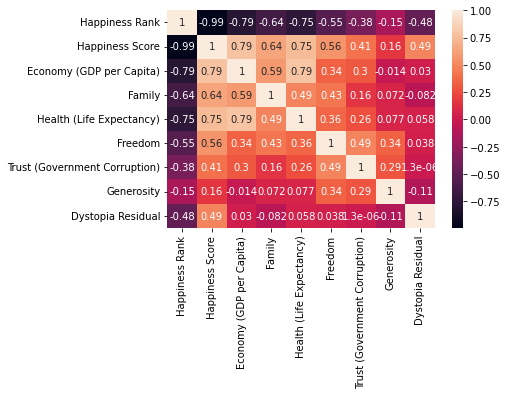

In [32]:
sns.heatmap(all_data.corr(), annot=True)

What pattern can we detect in the heatmap? Clearly, **Economy(GDP per Capita)** and **Health(Life Expectancy)** have the highest correlation coefficient to **Happiness Score** (at 0.79, and 0.75 respectively). Therefore we need to examine these greatest contributors to happiness further.

# Greatest Contributors to Happiness

In order to dig into the relationship between **Happiness Score** and the measures we have observed to be greatest contributors to happiness we create simple scatter plots. `sns.scatterplot` command are used and the values are specified, for instance, for:
- the horizontal x-axis (`x=all_data['Happiness Score']`) and
- the horizontal y-axis (`y=all_data['Economy (GDP per Capita)']`).

### GDP vs Happiness

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

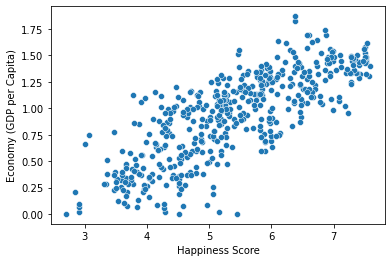

In [20]:
sns.scatterplot(x=all_data['Happiness Score'], y=all_data['Economy (GDP per Capita)'])

The scatterplot above suggests that Happiness Score and  Economy (GDP per Capita)are **positively correlated**, where countries with higher GDP per Capita typically also tend to have happier people. 

To double-check the strength of this relationship, you might like to add a **regression line**, or the line that best fits the data.  This done by changing the command to `sns.regplot`.

<AxesSubplot:xlabel='Happiness Score', ylabel='Economy (GDP per Capita)'>

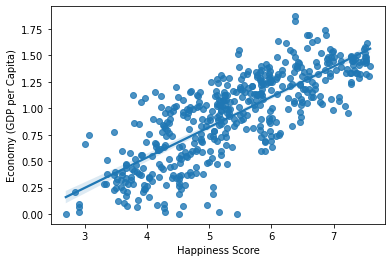

In [21]:
sns.regplot(x=all_data['Happiness Score'], y=all_data['Economy (GDP per Capita)'])

### Health vs Happiness

<AxesSubplot:xlabel='Happiness Score', ylabel='Health (Life Expectancy)'>

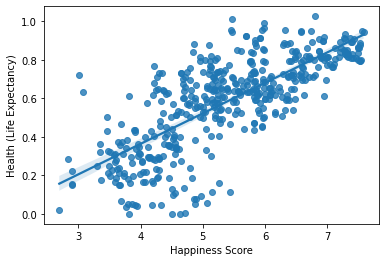

In [22]:
sns.regplot(x=all_data['Happiness Score'], y=all_data['Health (Life Expectancy)'])

Positive correlation between happiness and health (life expectancy). But the question is: Are **happy people heathy**, or are **healthy people happy**? We know that they are related but we don't know what causes the other. Finally what contribute to long life expectancy? If we know that longer life expectancy is related to happiness what help create long life expectancy within a country? To answer these, we need to consider the relationship between Gross Domestic Product (GDP) and health. Because if we know that that the overall economic status of a country (**GDP**) is related to the overall **health** of its people, and health is related to **happiness**, we can infer further information from that.


### GDP vs Health

<AxesSubplot:xlabel='Economy (GDP per Capita)', ylabel='Health (Life Expectancy)'>

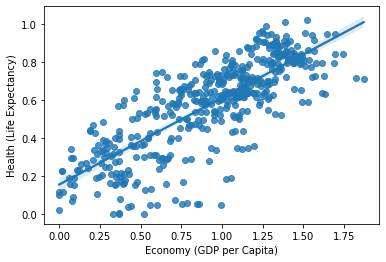

In [23]:
sns.regplot(x=all_data['Economy (GDP per Capita)'], y=all_data['Health (Life Expectancy)'])

#### Correlation Coefficient
The scatterplot above shows a positive correlation between GDP and Health. To see how strong this relationship is, we further need to find the correlation coefficient.

In [24]:
all_data[['Happiness Score', 'Economy (GDP per Capita)']].corr()

,Happiness Score,Economy (GDP per Capita)
Happiness Score,1.00000,0.78545
Economy (GDP per Capita),0.78545,1.00000


In [25]:
all_data[['Happiness Score', 'Health (Life Expectancy)']].corr()

,Happiness Score,Health (Life Expectancy)
Happiness Score,1.00000,0.74804
Health (Life Expectancy),0.74804,1.00000


In [26]:
all_data[['Economy (GDP per Capita)', 'Health (Life Expectancy)']].corr()

,Economy (GDP per Capita),Health (Life Expectancy)
Economy (GDP per Capita),1.000000,0.792224
Health (Life Expectancy),0.792224,1.000000


The table above shows approximately 0.8 correlation coefficient between the overall economics status of a country and the health of the people. This is slightly higher than the correlation coefficient for health and happiness or GDP and happiness. 


# Conclusion

1. **Wealthier** countries and those that have sustained growth tend to have have higher average **happiness** levels.

2. **Healthier** countries also tend to have a **happier** population. However, **healthier** countries also tend to be **wealthy**.

3. Evidence suggests that **wealth**, **health**, and **happiness** go together. This does not mean, however, there is a causal effect. Further analysis is needed.